In [2]:
from sklearn import linear_model
import numpy as np
import pandas as pd

In [3]:
data = {'x1' : [1,4,5,8, 10],
       'x2': [3, 5, 7, 9, 10],
       'x3': [7, 8, 5, 7, 4],
       'y': [30, 40, 45, 60, 61]}

data = pd.DataFrame(data)
data

,x1,x2,x3,y
0,1,3,7,30
1,4,5,8,40
2,5,7,5,45
3,8,9,7,60
4,10,10,4,61


In [4]:
linear_regression = linear_model.LinearRegression()

linear_regression.fit(X = data[['x1', 'x2', 'x3']], y = data['y'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [5]:
linear_regression.score(X = data[['x1', 'x2', 'x3']], y = data['y'])

0.9952763020975957

In [6]:
prediction = linear_regression.predict(X = data[['x1', 'x2', 'x3']])
prediction

array([28.98387097, 41.06451613, 45.82258065, 59.32258065, 60.80645161])

In [7]:
residual = prediction-data['y']
residual

0   -1.016129
1    1.064516
2    0.822581
3   -0.677419
4   -0.193548
Name: y, dtype: float64

In [27]:
MSE = (residual **2).sum()/5
MSE

3.4314087759815264

In [28]:
RMSE = (((residual **2).sum()/5) ** 0.5)
RMSE

1.8524062124657017

## X1에 대한 VIF 계산

In [10]:
linear_regression = linear_model.LinearRegression()

linear_regression.fit(X = data[['x2', 'x3']], y = data['x1'])

print('a value = ', linear_regression.intercept_)

print('b value = ', linear_regression.coef_)

a value =  -3.4623255813953495
b value =  [1.2427907  0.09860465]


In [11]:
r_square = linear_regression.score(X = data[['x2', 'x3']], y = data['x1'])
r_square

0.9730383815466063

In [12]:
vlf_x1 = 1./(1. - r_square)
vlf_x1

37.08976157082763

##  VIF 계산 함수 정의

In [15]:
from sklearn.linear_model import LinearRegression

def sklearn_vif(X, y):
    r_square = LinearRegression().fit(X, y).score(X, y)
    
    vif = 1./(1. - r_square)
    return vif

## X2에 대한 VIF 계산

In [16]:
sklearn_vif(data[['x1', 'x3']], data['x2'])

39.83842917251046

## X3에 대한 VIF 계산

In [17]:
sklearn_vif(data[['x1', 'x2']], data['x3'])

1.726788218793828

## VIF 가 높은 X2를 제거한 후 VIF 계산

In [19]:
sklearn_vif(data[['x1']], data['x3'])

1.5339491916859125

In [20]:
sklearn_vif(data[['x3']], data['x1'])

1.5339491916859123

## VIF 가 높은 X2를 제거한 후 MSE, RMSE 계산

In [21]:
linear_regression = linear_model.LinearRegression()

linear_regression.fit(X = data[['x1', 'x3']], y = data['y'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
linear_regression.score(X = data[['x1', 'x3']], y = data['y'])

0.9757257443691176

In [25]:
prediction = linear_regression.predict(X = data[['x1', 'x3']])
prediction

array([29.61778291, 42.48845266, 43.70323326, 57.4965358 , 62.69399538])

In [26]:
residual = prediction - data['y']
residual

0   -0.382217
1    2.488453
2   -1.296767
3   -2.503464
4    1.693995
Name: y, dtype: float64

In [29]:
MSE = (residual **2).sum()/5
MSE

3.4314087759815264

In [30]:
RMSE = (((residual **2).sum()/5) ** 0.5)
RMSE

1.8524062124657017

# 미국 경제 데이터를 이용한 다중 공선성

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [37]:
import statsmodels.api as sm
from statsmodels.datasets.longley import load_pandas

In [39]:
dfX = load_pandas().exog
dfX

,GNPDEFL,GNP,UNEMP,ARMED,POP,YEAR
0,83.0,234289.0,2356.0,1590.0,107608.0,1947.0
1,88.5,259426.0,2325.0,1456.0,108632.0,1948.0
2,88.2,258054.0,3682.0,1616.0,109773.0,1949.0
3,89.5,284599.0,3351.0,1650.0,110929.0,1950.0
4,96.2,328975.0,2099.0,3099.0,112075.0,1951.0
5,98.1,346999.0,1932.0,3594.0,113270.0,1952.0
6,99.0,365385.0,1870.0,3547.0,115094.0,1953.0
7,100.0,363112.0,3578.0,3350.0,116219.0,1954.0
8,101.2,397469.0,2904.0,3048.0,117388.0,1955.0
9,104.6,419180.0,2822.0,2857.0,118734.0,1956.0


In [40]:
dfy = load_pandas().endog
dfy

0     60323.0
1     61122.0
2     60171.0
3     61187.0
4     63221.0
5     63639.0
6     64989.0
7     63761.0
8     66019.0
9     67857.0
10    68169.0
11    66513.0
12    68655.0
13    69564.0
14    69331.0
15    70551.0
Name: TOTEMP, dtype: float64

In [41]:
df = pd.concat([dfX, dfy], axis = 1)
df

,GNPDEFL,GNP,UNEMP,ARMED,POP,YEAR,TOTEMP
0,83.0,234289.0,2356.0,1590.0,107608.0,1947.0,60323.0
1,88.5,259426.0,2325.0,1456.0,108632.0,1948.0,61122.0
2,88.2,258054.0,3682.0,1616.0,109773.0,1949.0,60171.0
3,89.5,284599.0,3351.0,1650.0,110929.0,1950.0,61187.0
4,96.2,328975.0,2099.0,3099.0,112075.0,1951.0,63221.0
5,98.1,346999.0,1932.0,3594.0,113270.0,1952.0,63639.0
6,99.0,365385.0,1870.0,3547.0,115094.0,1953.0,64989.0
7,100.0,363112.0,3578.0,3350.0,116219.0,1954.0,63761.0
8,101.2,397469.0,2904.0,3048.0,117388.0,1955.0,66019.0
9,104.6,419180.0,2822.0,2857.0,118734.0,1956.0,67857.0


In [42]:
df.corr()

,GNPDEFL,GNP,UNEMP,ARMED,POP,YEAR,TOTEMP
GNPDEFL,1.000000,0.991589,0.620633,0.464744,0.979163,0.991149,0.970899
GNP,0.991589,1.000000,0.604261,0.446437,0.991090,0.995273,0.983552
UNEMP,0.620633,0.604261,1.000000,-0.177421,0.686552,0.668257,0.502498
ARMED,0.464744,0.446437,-0.177421,1.000000,0.364416,0.417245,0.457307
POP,0.979163,0.991090,0.686552,0.364416,1.000000,0.993953,0.960391
YEAR,0.991149,0.995273,0.668257,0.417245,0.993953,1.000000,0.971329
TOTEMP,0.970899,0.983552,0.502498,0.457307,0.960391,0.971329,1.000000


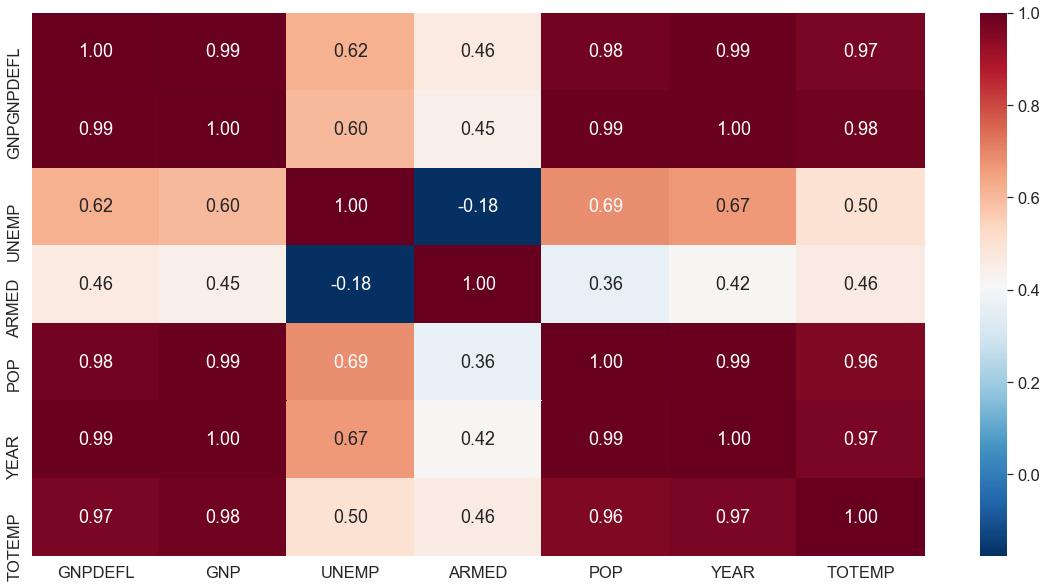

In [45]:
import seaborn as sns
sns.set(font_scale= 1.5)
f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="RdBu_r")

In [46]:
y = df['TOTEMP']
y

0     60323.0
1     61122.0
2     60171.0
3     61187.0
4     63221.0
5     63639.0
6     64989.0
7     63761.0
8     66019.0
9     67857.0
10    68169.0
11    66513.0
12    68655.0
13    69564.0
14    69331.0
15    70551.0
Name: TOTEMP, dtype: float64

In [93]:
X = df.drop(['TOTEMP', 'YEAR'], axis = 1)
X.head()

,GNPDEFL,GNP,UNEMP,ARMED,POP
0,83.0,234289.0,2356.0,1590.0,107608.0
1,88.5,259426.0,2325.0,1456.0,108632.0
2,88.2,258054.0,3682.0,1616.0,109773.0
3,89.5,284599.0,3351.0,1650.0,110929.0
4,96.2,328975.0,2099.0,3099.0,112075.0


In [49]:
GNPDEFL = df['GNPDEFL']
GNPDEFL

0      83.0
1      88.5
2      88.2
3      89.5
4      96.2
5      98.1
6      99.0
7     100.0
8     101.2
9     104.6
10    108.4
11    110.8
12    112.6
13    114.2
14    115.7
15    116.9
Name: GNPDEFL, dtype: float64

## 하나의 열에 대해서 0~1 사이로 정규화

In [54]:
(GNPDEFL - GNPDEFL.min())/(GNPDEFL.max() - GNPDEFL.min())

0     0.000000
1     0.162242
2     0.153392
3     0.191740
4     0.389381
5     0.445428
6     0.471976
7     0.501475
8     0.536873
9     0.637168
10    0.749263
11    0.820059
12    0.873156
13    0.920354
14    0.964602
15    1.000000
Name: GNPDEFL, dtype: float64

## 함수를 활용하여 모든 열에 대해서 0~1사이로 정규화

In [55]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X)

X_scaled = scaler.transform(X)
X_scaled

array([[0.        , 0.        , 0.16553134, 0.0626754 , 0.        ],
       [0.16224189, 0.07840489, 0.15497275, 0.        , 0.04556579],
       [0.15339233, 0.07412548, 0.61716621, 0.0748363 , 0.09633783],
       [0.19174041, 0.15692207, 0.50442779, 0.09073901, 0.14777733],
       [0.38938053, 0.29533538, 0.07799728, 0.76847521, 0.19877186],
       [0.44542773, 0.35155409, 0.02111717, 1.        , 0.25194678],
       [0.4719764 , 0.40890192, 0.        , 0.97801684, 0.33311084],
       [0.50147493, 0.4018122 , 0.58174387, 0.88587465, 0.38317092],
       [0.53687316, 0.50897522, 0.35217984, 0.74462114, 0.43518889],
       [0.63716814, 0.57669406, 0.32425068, 0.65528531, 0.49508299],
       [0.74926254, 0.65027058, 0.36307902, 0.62768943, 0.5712188 ],
       [0.820059  , 0.65581323, 0.95742507, 0.55238541, 0.63818805],
       [0.87315634, 0.77483196, 0.66178474, 0.51262862, 0.70119699],
       [0.92035398, 0.83689275, 0.70197548, 0.494855  , 0.79028167],
       [0.96460177, 0.88546342, 1.

In [95]:
X = pd.DataFrame(X_scaled, columns=X.columns)
X

,GNPDEFL,GNP,UNEMP,ARMED,POP
0,0.000000,0.000000,0.165531,0.062675,0.000000
1,0.162242,0.078405,0.154973,0.000000,0.045566
2,0.153392,0.074125,0.617166,0.074836,0.096338
3,0.191740,0.156922,0.504428,0.090739,0.147777
4,0.389381,0.295335,0.077997,0.768475,0.198772
5,0.445428,0.351554,0.021117,1.000000,0.251947
6,0.471976,0.408902,0.000000,0.978017,0.333111
7,0.501475,0.401812,0.581744,0.885875,0.383171
8,0.536873,0.508975,0.352180,0.744621,0.435189
9,0.637168,0.576694,0.324251,0.655285,0.495083


In [57]:
exog = X
exog_idx = 0

In [62]:
k_vars = exog.values.shape[1]
k_vars

5

In [63]:
arr = np.arange(k_vars)
arr

array([0, 1, 2, 3, 4])

In [66]:
x_not_i = exog.iloc[:, arr != exog_idx]
x_not_i

,GNP,UNEMP,ARMED,POP
0,0.000000,0.165531,0.062675,0.000000
1,0.078405,0.154973,0.000000,0.045566
2,0.074125,0.617166,0.074836,0.096338
3,0.156922,0.504428,0.090739,0.147777
4,0.295335,0.077997,0.768475,0.198772
5,0.351554,0.021117,1.000000,0.251947
6,0.408902,0.000000,0.978017,0.333111
7,0.401812,0.581744,0.885875,0.383171
8,0.508975,0.352180,0.744621,0.435189
9,0.576694,0.324251,0.655285,0.495083


In [67]:
x_i = exog.iloc[:, exog_idx]
x_i

0     0.000000
1     0.162242
2     0.153392
3     0.191740
4     0.389381
5     0.445428
6     0.471976
7     0.501475
8     0.536873
9     0.637168
10    0.749263
11    0.820059
12    0.873156
13    0.920354
14    0.964602
15    1.000000
Name: GNPDEFL, dtype: float64

In [69]:
lr = LinearRegression().fit(X=x_not_i, y = x_i)
r_square = lr.score(X = x_not_i, y = x_i)
1 / (1-r_square)

130.82920134037101

## 모든 요소에 대해서 VIF 값을 구하기 위해 함수 정의

In [70]:
def variance_inflation_factor(exog, exog_idx):
    
    k_vars = exog.values.shape[1]
    arr = np.arange(k_vars)
    x_not_i = exog.iloc[:, arr != exog_idx]
    x_i = exog.iloc[:, exog_idx]
    lr = LinearRegression().fit(X=x_not_i, y = x_i)
    r_square = lr.score(X = x_not_i, y = x_i)
    return 1 / (1-r_square)

In [84]:
vif = pd.DataFrame()
vif["VIFFactor"] = [variance_inflation_factor(X, i) for i in range(X.values.shape[1])]
vif["features"] = X.columns

In [85]:
vif

,VIFFactor,features
0,130.829201,GNPDEFL
1,639.049777,GNP
2,10.786858,UNEMP
3,2.505775,ARMED
4,339.011693,POP


## VIF 값이 가장 큰 GNP를 제거

In [86]:
X = X.drop(['GNP'], axis = 1)
X.head()

,GNPDEFL,UNEMP,ARMED,POP
0,0.000000,0.165531,0.062675,0.000000
1,0.162242,0.154973,0.000000,0.045566
2,0.153392,0.617166,0.074836,0.096338
3,0.191740,0.504428,0.090739,0.147777
4,0.389381,0.077997,0.768475,0.198772


In [88]:
vif = pd.DataFrame()
vif["VIFFactor"] = [variance_inflation_factor(X, i) for i in range(X.values.shape[1])]
vif["features"] = X.columns
vif

,VIFFactor,features
0,35.970754,GNPDEFL
1,3.147600,UNEMP
2,2.497795,ARMED
3,34.588299,POP


## VIF Factor 값을 계산해서 가장 높은 GNPDEFL을 제거

In [89]:
X = X.drop(['GNPDEFL'], axis = 1)
X.head()

,UNEMP,ARMED,POP
0,0.165531,0.062675,0.000000
1,0.154973,0.000000,0.045566
2,0.617166,0.074836,0.096338
3,0.504428,0.090739,0.147777
4,0.077997,0.768475,0.198772


In [90]:
vif = pd.DataFrame()
vif["VIFFactor"] = [variance_inflation_factor(X, i) for i in range(X.values.shape[1])]
vif["features"] = X.columns
vif

,VIFFactor,features
0,3.146686,UNEMP
1,1.918225,ARMED
2,3.514335,POP


In [91]:
reg = LinearRegression()
reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## 수동으로 Feature를 쳐내는 것이 아닌 자동으로 Feature 쳐내기

In [160]:
(vif.loc[((vif.loc[vif["VIFFactor"]>=10, "VIFFactor"]).idxmax()), "features"])

'GNP'

In [166]:
def drop_feature(X):
    vif = pd.DataFrame()
    vif["VIFFactor"] = [variance_inflation_factor(X, i) for i in range(X.values.shape[1])]
    vif["features"] = X.columns
    while check_VIF(vif):
        
        X = X.drop((vif.loc[((vif.loc[vif["VIFFactor"]>=10, "VIFFactor"]).idxmax()), "features"]), axis = 1)
        vif = pd.DataFrame()
        vif["VIFFactor"] = [variance_inflation_factor(X, i) for i in range(X.values.shape[1])]
        vif["features"] = X.columns
    return X

In [140]:
def check_VIF(X):
    return X["VIFFactor"].max() >= 10

In [167]:
tmp_X = drop_feature(X)
tmp_X

,UNEMP,ARMED,POP
0,0.165531,0.062675,0.000000
1,0.154973,0.000000,0.045566
2,0.617166,0.074836,0.096338
3,0.504428,0.090739,0.147777
4,0.077997,0.768475,0.198772
5,0.021117,1.000000,0.251947
6,0.000000,0.978017,0.333111
7,0.581744,0.885875,0.383171
8,0.352180,0.744621,0.435189
9,0.324251,0.655285,0.495083
